# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents 17 campaigns from May of 2008 to November of 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
%pip install scikit-learn
%pip install numpy
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import time
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score



In [3]:
bank_full_df = pd.read_csv('./data/bank-additional-full.csv', sep = ';')

In [4]:
bank_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
# Number of rows with "unknown" value
num_unknown_job = (bank_full_df['job'] == 'unknown').sum() # 330
print('num_unknown_job', num_unknown_job)

num_unknown_marital = (bank_full_df['marital'] == 'unknown').sum() # 80
print('num_unknown_marital', num_unknown_marital)

num_unknown_education = (bank_full_df['education'] == 'unknown').sum() # 1731
print('num_unknown_education', num_unknown_education)

num_unknown_default = (bank_full_df['default'] == 'unknown').sum() # 8597
print('num_unknown_default', num_unknown_default)

num_unknown_housing = (bank_full_df['housing'] == 'unknown').sum() # 990
print('num_unknown_housing', num_unknown_housing)

num_unknown_loan = (bank_full_df['loan'] == 'unknown').sum() # 990
print('num_unknown_loan', num_unknown_loan)

# Rows with missing values
rows_with_missing_data = bank_full_df[bank_full_df.isnull().any(axis=1)]
print('rows_with_missing_data', rows_with_missing_data) # No rows are missing data


num_unknown_job 330
num_unknown_marital 80
num_unknown_education 1731
num_unknown_default 8597
num_unknown_housing 990
num_unknown_loan 990
rows_with_missing_data Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]


In [6]:
# Convert 'month' column to one of four seasons 'winter' (Dec, Jan, Feb),
# 'spring', (March, April, May), 'summer' (June, July, Aug), 'fall' (Sept, Oct, Nov)
def categorize_season(month):
    if month in ['dec', 'jan', 'feb']:
        return 'winter'
    elif month in ['mar', 'apr', 'may']:
        return 'spring'
    elif month in ['jun', 'jul', 'aug']:
        return 'summer'
    else:
        return 'fall'

# Create age ranges from values
def categorize_age(age):
    if age < 30:
        return '<30'
    elif age >= 30 and age < 50:
        return '30-49'
    elif age >= 50 and age < 70:
        return '50-69'
    elif age >= 70 and age < 90:
        return '70-89'
    else:
        return '>90'

# Create ranges for pdays
def categorize_pdays(pdays):
    if pdays >= 0 and pdays < 5:
        return '0-4'
    elif pdays >= 5 and pdays < 10:
        return '5-9'
    elif pdays >= 10 and pdays < 15:
        return '10-14'
    elif pdays >= 15 and pdays < 20:
        return '15-19'
    elif pdays >= 20 and pdays < 25:
        return '20-24'
    elif pdays >= 25 and pdays < 30:
        return '25-29'
    else:
        return 'not_prev_contacted'


def clean_df_data(df):
    # Remove rows with "unknown" value
    clean_df = df[df['job'] != 'unknown']
    clean_df = clean_df[clean_df['marital'] != 'unknown']
    clean_df = clean_df[clean_df['education'] != 'unknown']
    clean_df = clean_df[clean_df['default'] != 'unknown']
    clean_df = clean_df[clean_df['housing'] != 'unknown']
    clean_df = clean_df[clean_df['loan'] != 'unknown']

    # Remove "duration" column based on description above for better predictive model
    clean_df = clean_df.drop('duration', axis=1)

    # convert month to season
    clean_df['season'] = clean_df['month'].apply(categorize_season)
    # Drop month because it's now represented as season
    clean_df = clean_df.drop('month', axis=1)

    # convert pdays to pdays_range. Initial values from whole dataset 0 - 27 and 999
    clean_df['pdays_range'] = clean_df['pdays'].apply(categorize_pdays)
    clean_df['pdays_range'].unique()
    # Drop pdays because it's now represented as pdays_range
    clean_df = clean_df.drop('pdays', axis=1)

    # convert age to range. Initial values from whole dataset 17 - 95
    clean_df['age_range'] = clean_df['age'].apply(categorize_age)
    # Drop age because it's now represented as age_range
    clean_df = clean_df.drop('age', axis=1)
    return clean_df


In [7]:
clean_bank_full_df=clean_df_data(bank_full_df)
clean_bank_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             30488 non-null  object 
 1   marital         30488 non-null  object 
 2   education       30488 non-null  object 
 3   default         30488 non-null  object 
 4   housing         30488 non-null  object 
 5   loan            30488 non-null  object 
 6   contact         30488 non-null  object 
 7   day_of_week     30488 non-null  object 
 8   campaign        30488 non-null  int64  
 9   previous        30488 non-null  int64  
 10  poutcome        30488 non-null  object 
 11  emp.var.rate    30488 non-null  float64
 12  cons.price.idx  30488 non-null  float64
 13  cons.conf.idx   30488 non-null  float64
 14  euribor3m       30488 non-null  float64
 15  nr.employed     30488 non-null  float64
 16  y               30488 non-null  object 
 17  season          30488 non-null  obje

/tmp/ipython-input-96947798.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


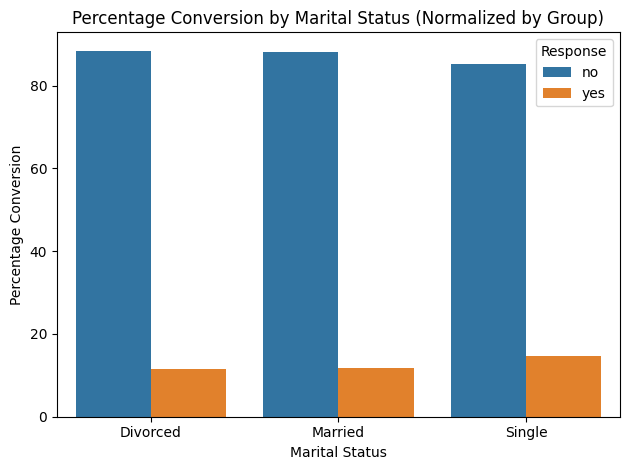

In [81]:
percentages = (
    clean_bank_full_df.groupby('marital')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
new_labels = ["Divorced", "Married", "Single"]


ax=sns.barplot(
    data=percentages,
    x='marital', y='percentage', hue='y'
)
ax.legend(title="Response")
plt.ylabel('Percentage Conversion')
plt.xlabel('Marital Status')
plt.title('Percentage Conversion by Marital Status (Normalized by Group)')
ax.set_xticklabels(new_labels)
plt.tight_layout()
plt.savefig("./Subscription_by_Marital_Status.png")

plt.show()

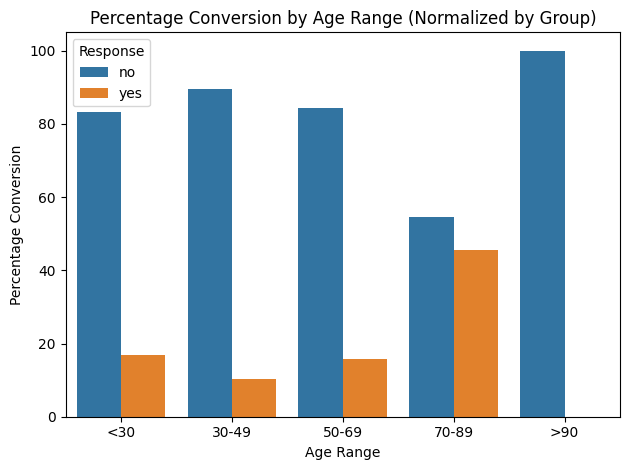

In [82]:
percentages = (
    clean_bank_full_df.groupby('age_range')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
order=['<30', '30-49', '50-69', '70-89', '>90']
ax=sns.barplot(
    data=percentages,
    x='age_range', y='percentage', hue='y', order=order
)
ax.legend(title="Response")
plt.ylabel('Percentage Conversion')
plt.xlabel('Age Range')
plt.title('Percentage Conversion by Age Range (Normalized by Group)')
plt.tight_layout()
plt.savefig("./Subscription_by_Age_Range.png")

plt.show()

/tmp/ipython-input-1399539972.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


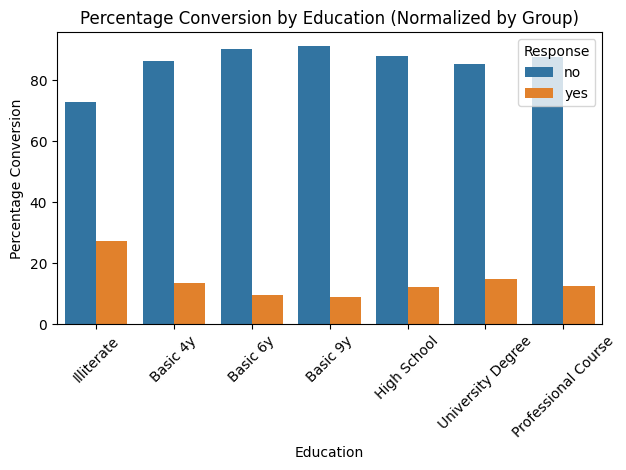

In [83]:
percentages = (
    clean_bank_full_df.groupby('education')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
order=['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'university.degree', 'professional.course']
new_labels=['Illiterate', 'Basic 4y', 'Basic 6y', 'Basic 9y', 'High School', 'University Degree', 'Professional Course']
percentages
ax=sns.barplot(
    data=percentages,
    x='education', y='percentage', hue='y', order=order
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Education')
plt.title('Percentage Conversion by Education (Normalized by Group)')
ax.set_xticklabels(new_labels)
plt.tight_layout()
plt.savefig("./Subscription_by_Education.png")

plt.show()

/tmp/ipython-input-3233458722.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


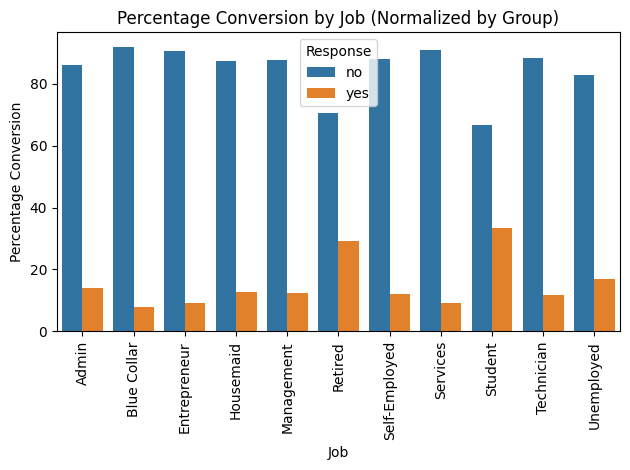

In [84]:
percentages = (
    clean_bank_full_df.groupby('job')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
ax=sns.barplot(
    data=percentages,
    x='job', y='percentage', hue='y'
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=90)
plt.ylabel('Percentage Conversion')
plt.xlabel('Job')
plt.title('Percentage Conversion by Job (Normalized by Group)')
new_labels=['Admin', 'Blue Collar', 'Entrepreneur', 'Housemaid', 'Management', 'Retired', 'Self-Employed', 'Services', 'Student', 'Technician', 'Unemployed']
ax.set_xticklabels(new_labels)
plt.tight_layout()
plt.savefig("./Subscription_by_Job.png")

plt.show()

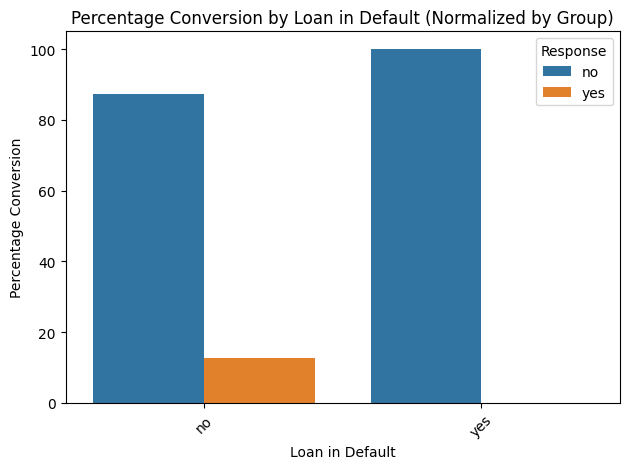

In [85]:
#default
percentages = (
    clean_bank_full_df.groupby('default')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
ax=sns.barplot(
    data=percentages,
    x='default', y='percentage', hue='y'
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Loan in Default')
plt.title('Percentage Conversion by Loan in Default (Normalized by Group)')
plt.tight_layout()

plt.savefig("./Subscription_by_Default.png")

plt.show()

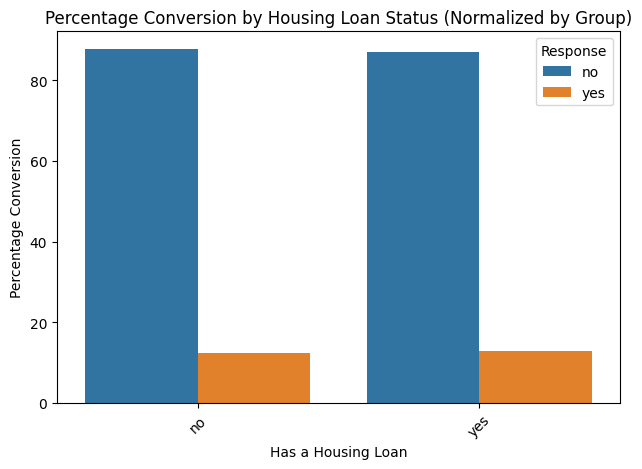

In [86]:
#housing
percentages = (
    clean_bank_full_df.groupby('housing')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
ax=sns.barplot(
    data=percentages,
    x='housing', y='percentage', hue='y'
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Has a Housing Loan')
plt.title('Percentage Conversion by Housing Loan Status (Normalized by Group)')
plt.tight_layout()

plt.savefig("./Subscription_by_Housing.png")

plt.show()

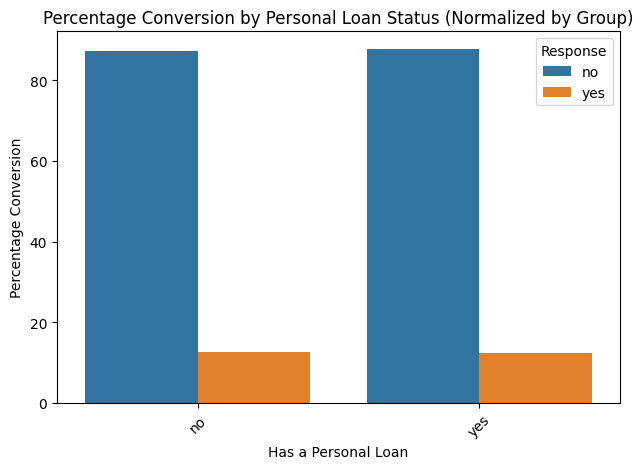

In [87]:
#loan
percentages = (
    clean_bank_full_df.groupby('loan')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
ax=sns.barplot(
    data=percentages,
    x='loan', y='percentage', hue='y'
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Has a Personal Loan')
plt.title('Percentage Conversion by Personal Loan Status (Normalized by Group)')
plt.tight_layout()

plt.savefig("./Subscription_by_Loan.png")

plt.show()

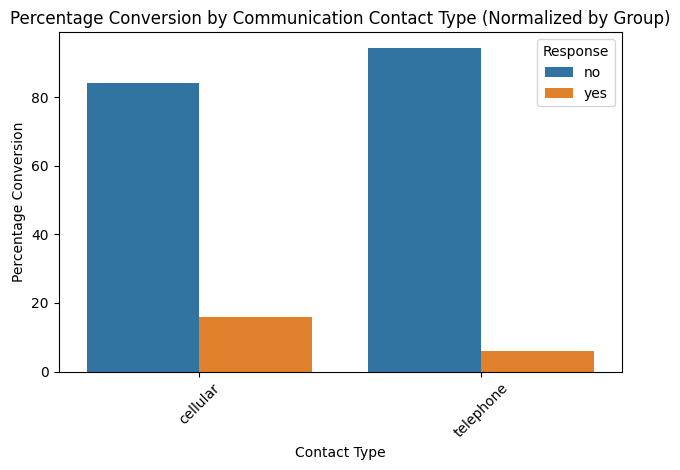

In [100]:
# contact
percentages = (
    clean_bank_full_df.groupby('contact')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
ax=sns.barplot(
    data=percentages,
    x='contact', y='percentage', hue='y'
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Contact Type')
plt.title('Percentage Conversion by Communication Contact Type (Normalized by Group)')
plt.tight_layout()
plt.savefig("./Subscription_by_Contact.png", bbox_inches="tight")

plt.show()

/tmp/ipython-input-2384155216.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


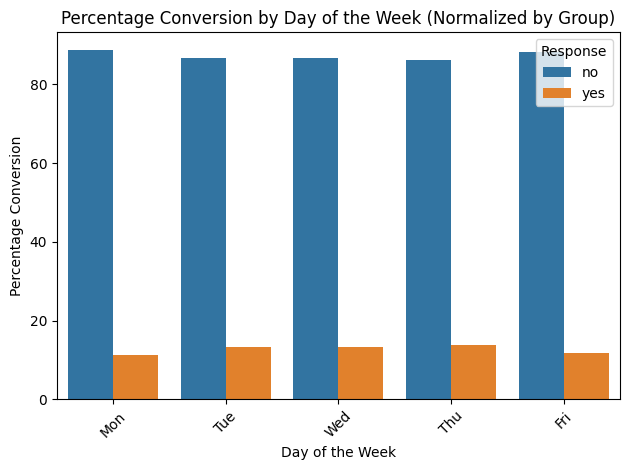

In [89]:
# day_of_week
percentages = (
    clean_bank_full_df.groupby('day_of_week')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
order=['mon', 'tue', 'wed', 'thu', 'fri']
ax=sns.barplot(
    data=percentages,
    x='day_of_week', y='percentage', hue='y',
    order=order
)
new_labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Day of the Week')
plt.title('Percentage Conversion by Day of the Week (Normalized by Group)')
ax.set_xticklabels(new_labels)
plt.tight_layout()
plt.savefig("./Subscription_by_Day_of_Week.png")

plt.show()

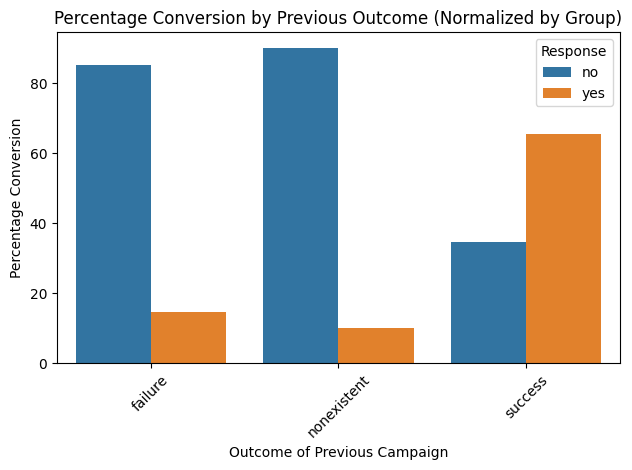

In [90]:
# poutcome
percentages = (
    clean_bank_full_df.groupby('poutcome')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
ax=sns.barplot(
    data=percentages,
    x='poutcome', y='percentage', hue='y'
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Outcome of Previous Campaign')
plt.title('Percentage Conversion by Previous Outcome (Normalized by Group)')
plt.tight_layout()
plt.savefig("./Subscription_by_Previous_Outcome.png")

plt.show()

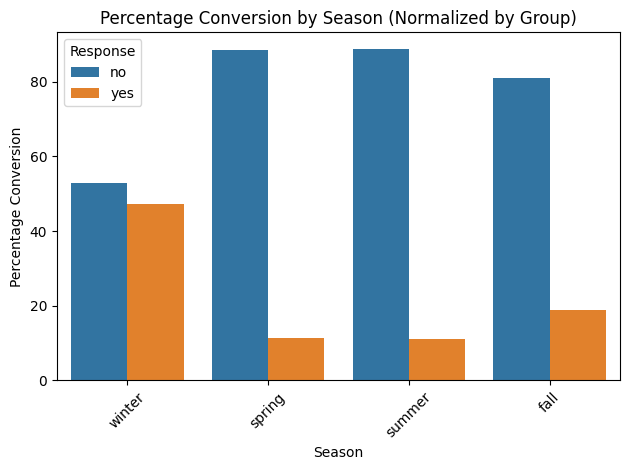

In [91]:
# poutcome
percentages = (
    clean_bank_full_df.groupby('season')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
order=['winter', 'spring', 'summer', 'fall']
ax=sns.barplot(
    data=percentages,
    x='season', y='percentage', hue='y',
    order=order
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Season')
plt.title('Percentage Conversion by Season (Normalized by Group)')
plt.tight_layout()
plt.savefig("./Subscription_by_Season.png")

plt.show()

/tmp/ipython-input-2113748195.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


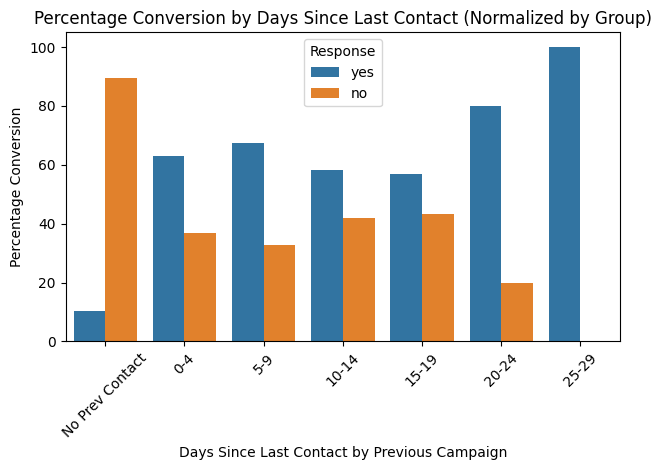

In [101]:
#pdays_range
percentages = (
    clean_bank_full_df.groupby('pdays_range')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
order=['not_prev_contacted', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29']
ax=sns.barplot(
    data=percentages,
    x='pdays_range', y='percentage', hue='y',
    order=order
)
new_labels=['No Prev Contact', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29']
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Days Since Last Contact by Previous Campaign')
plt.title('Percentage Conversion by Days Since Last Contact (Normalized by Group)')
ax.set_xticklabels(new_labels)
plt.tight_layout()
plt.savefig("./Subscription_by_Days_Since_Prev_Contact.png", bbox_inches="tight")

plt.show()


In [20]:
# Create function to remove the fields from the dataframe that do not appear to vary across criteria
# based on the graphs above. The function allows for reusability because the SVC calculation uses
# a subset of the data based on its high computational requirements but requires the same data cleanup.
def remove_irrelevant_fields(df):
  return df.drop(columns=['marital', 'education', 'housing', 'loan', 'day_of_week', 'pdays_range'])

In [21]:
relevant_fields_df=remove_irrelevant_fields(clean_bank_full_df)

In [22]:
relevant_fields_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             30488 non-null  object 
 1   default         30488 non-null  object 
 2   contact         30488 non-null  object 
 3   campaign        30488 non-null  int64  
 4   previous        30488 non-null  int64  
 5   poutcome        30488 non-null  object 
 6   emp.var.rate    30488 non-null  float64
 7   cons.price.idx  30488 non-null  float64
 8   cons.conf.idx   30488 non-null  float64
 9   euribor3m       30488 non-null  float64
 10  nr.employed     30488 non-null  float64
 11  y               30488 non-null  object 
 12  season          30488 non-null  object 
 13  age_range       30488 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 3.5+ MB


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The Business Objective is to analyze the data from 17 marketing campaigns to identify key factors
that influence client decisions, and create a predictive model that accurately predicts whether a
prospective client will subscribe to a term deposit. The bank will be able to use this model and
information to create effective and efficient campaign strategies that increase subscriptions
to term deposits.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [23]:
X = relevant_fields_df.drop('y', axis=1)
y = relevant_fields_df.y

le = LabelEncoder()
y = le.fit_transform(y)

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
print('categorical_columns', categorical_columns)
print('numerical_columns', numerical_columns)

categorical_columns ['job', 'default', 'contact', 'poutcome', 'season', 'age_range']
numerical_columns ['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [24]:
# Encodes the categorical data and standardizes numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

The classifier should efficiently and accurately predict whether a client will subscribe to a term deposit 90% of the time. This level of accuracy would provide the bank with significant power to target clients most likely to convert while recognizing that inaccurate estimates is not exorbinantly expensive either monetarily or consequentially.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [26]:
# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logisticregression', LogisticRegression(max_iter=500))
])

# Perform grid search with 5-fold cross validation
grid_search = GridSearchCV(pipeline, param_grid={'logisticregression__C': [0.1, 1, 10]}, cv=5, n_jobs=-1, scoring="accuracy")

# Fit the model and time it
start_time = time.time()
grid_search.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate on training and test sets
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print('fit_time', fit_time)
print('best_model', best_model)
print('train_score', train_score)
print('test_score', test_score)
logistic_regression_result={ "model": "Logistic Regression", "train_time": fit_time, "train_accuracy": train_score, "test_accuracy": test_score}

fit_time 2.1537652810414634
best_model Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'default', 'contact',
                                                   'poutcome', 'season',
                                                   'age_range'])])),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=500))])
train_score 0.8891348913489134
test_

### Problem 9: Score the Model

What is the accuracy of your model?

The model was 88.59% accurate on the test data.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [27]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

# Perform grid search with 5-fold cross validation and a variety of hyperparameters
grid_search = GridSearchCV(pipeline, param_grid={'knn__n_neighbors': [3, 5, 7]}, cv=5, n_jobs=-1, scoring="accuracy")

# Fit the model and time it
start_time = time.time()
grid_search.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate on training and test sets
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print('fit_time', fit_time)
print('best_model', best_model)
print('train_score', train_score)
print('test_score', test_score)
knn_result={ "model": "KNN", "train_time": fit_time, "train_accuracy": train_score, "test_accuracy": test_score}

fit_time 3.916191021601359
best_model Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'default', 'contact',
                                                   'poutcome', 'season',
                                                   'age_range'])])),
                ('knn', KNeighborsClassifier(n_neighbors=7))])
train_score 0.9011890118901189
test_score 0.8773368317481142


In [28]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('decisiontreeclassifier', DecisionTreeClassifier())
])

# Perform grid search with 5-fold cross validation and a variety of hyperparameters
grid_search = GridSearchCV(pipeline, param_grid={'decisiontreeclassifier__max_depth': [2, 5, 7]}, cv=5, n_jobs=-1, scoring="accuracy")

# Fit the model and time it
start_time = time.time()
grid_search.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate on training and test sets
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print('fit_time', fit_time)
print('best_model', best_model)
print('train_score', train_score)
print('test_score', test_score)
decision_tree_classifier_result={ "model": "Decision Tree Classifier", "train_time": fit_time, "train_accuracy": train_score, "test_accuracy": test_score}

fit_time 0.49329908688863117
best_model Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'default', 'contact',
                                                   'poutcome', 'season',
                                                   'age_range'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5))])
train_score 0.8918819188191882
test

In [29]:
# Using the smaller data sample for the SVC because it's computationally demanding
bank_additional_df = pd.read_csv('./data/bank-additional.csv', sep = ';')

cleaned_df=clean_df_data(bank_additional_df)
clean_bank_additional_df=remove_irrelevant_fields(cleaned_df)
X_additional = clean_bank_additional_df.drop('y', axis=1)
y_additional = clean_bank_additional_df.y

le = LabelEncoder()
y_additional = le.fit_transform(y_additional)
categorical_columns = X_additional.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X_additional.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns) # Ignoring unknown because this is a subset of the whole data
    ]
)
X_additional_train, X_additional_test, y_additional_train, y_additional_test = train_test_split(X_additional, y_additional, test_size=0.2, random_state=42)
categorical_columns

['job', 'default', 'contact', 'poutcome', 'season', 'age_range']

In [30]:
# SVC Processor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC())
])

# Perform grid search with 5-fold cross validation and a variety of hyperparameters
grid_search = GridSearchCV(pipeline, param_grid={'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}, cv=5, n_jobs=-1, scoring="accuracy")

# Fit the model and time it
start_time = time.time()
grid_search.fit(X_additional_train, y_additional_train)
fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate on training and test sets
train_score = best_model.score(X_additional_train, y_additional_train)
test_score = best_model.score(X_additional_test, y_additional_test)
print('fit_time', fit_time)
print('best_model', best_model)
print('train_score', train_score)
print('test_score', test_score)
svc_result={ "model": "SVC", "train_time": fit_time, "train_accuracy": train_score, "test_accuracy": test_score}

fit_time 0.630643884340922
best_model Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'default', 'contact',
                                                   'poutcome', 'season',
                                                   'age_range'])])),
                ('svc', SVC(C=0.1, kernel='line

In [31]:
all_results=[logistic_regression_result, knn_result, decision_tree_classifier_result, svc_result]
result_df = pd.DataFrame(all_results)
result_df

,model,train_time,train_accuracy,test_accuracy
0,Logistic Regression,2.153765,0.889135,0.885864
1,KNN,3.916191,0.901189,0.877337
2,Decision Tree Classifier,0.493299,0.891882,0.884552
3,SVC,0.630644,0.886327,0.914239


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [32]:
# Explore the impact of different features
cleaned=clean_df_data(bank_full_df)
clean_all_df=remove_irrelevant_fields(cleaned)

# Three of the columns have the same response ("Yes" and "No") so they need to be distinguished by column
def add_default_prefix(word):
    return "default_" + word


clean_all_df['default'] = clean_all_df['default'].apply(add_default_prefix)


In [33]:
clean_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             30488 non-null  object 
 1   default         30488 non-null  object 
 2   contact         30488 non-null  object 
 3   campaign        30488 non-null  int64  
 4   previous        30488 non-null  int64  
 5   poutcome        30488 non-null  object 
 6   emp.var.rate    30488 non-null  float64
 7   cons.price.idx  30488 non-null  float64
 8   cons.conf.idx   30488 non-null  float64
 9   euribor3m       30488 non-null  float64
 10  nr.employed     30488 non-null  float64
 11  y               30488 non-null  object 
 12  season          30488 non-null  object 
 13  age_range       30488 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 3.5+ MB


In [34]:
# Explore the impact of different features
dummies_job=pd.get_dummies(clean_all_df['job'], dtype=int)
dummies_default=pd.get_dummies(clean_all_df['default'], dtype=int)
dummies_contact=pd.get_dummies(clean_all_df['contact'], dtype=int)
dummies_poutcome=pd.get_dummies(clean_all_df['poutcome'], dtype=int)
dummies_season=pd.get_dummies(clean_all_df['season'], dtype=int)
dummies_age_range=pd.get_dummies(clean_all_df['age_range'], dtype=int)
df = pd.concat([dummies_job, dummies_default, dummies_contact, dummies_poutcome, dummies_season, dummies_age_range], axis=1)

# Adding additional fields not previously explored to evaluate their impact
df['campaign']=clean_all_df['campaign']
df['previous']=clean_all_df['previous']
df['emp.var.rate']=clean_all_df['emp.var.rate']
df['cons.price.idx']=clean_all_df['cons.price.idx']
df['cons.conf.idx']=clean_all_df['cons.conf.idx']
df['euribor3m']=clean_all_df['euribor3m']
df['nr.employed']=clean_all_df['nr.employed']
# Mapping "y" column to numeric values
clean_all_df['y_numeric'] = clean_all_df['y'].map({'yes': 1, 'no': 0})
y=clean_all_df['y_numeric']
X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test=train_test_split(df, y, test_size=0.2, random_state=42)


In [35]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso_clf', LogisticRegression(penalty='l1', solver='liblinear', C=1.0))  # Lasso
])

pipeline.fit(X_lasso_train, y_lasso_train)

y_pred = pipeline.predict(X_lasso_test)
print("Accuracy:", accuracy_score(y_lasso_test, y_pred))
poly_feature_names = pipeline.named_steps['poly'].get_feature_names_out(X_lasso_train.columns)
# Get coefficients from L1 logistic regression
coefficients = pipeline.named_steps['lasso_clf'].coef_[0]

feature_importance = pd.DataFrame({
    'feature': poly_feature_names,
    'coefficient': coefficients,
}).sort_values(by='coefficient', ascending=False)

print(feature_importance)

Accuracy: 0.8860282059691702
                        feature  coefficient
437         telephone euribor3m     1.646812
626                 euribor3m^2     1.386977
616  emp.var.rate cons.conf.idx     1.377516
535        summer cons.conf.idx     1.196549
623             cons.conf.idx^2     1.055841
..                          ...          ...
519         spring emp.var.rate    -1.190637
628               nr.employed^2    -1.619938
33                  nr.employed    -1.667358
521        spring cons.conf.idx    -2.200754
624     cons.conf.idx euribor3m    -2.952493

[629 rows x 2 columns]


In [36]:
print('top 15', feature_importance.head(15))
print('bottom 15', feature_importance.tail(15))


top 15                           feature  coefficient
437           telephone euribor3m     1.646812
626                   euribor3m^2     1.386977
616    emp.var.rate cons.conf.idx     1.377516
535          summer cons.conf.idx     1.196549
623               cons.conf.idx^2     1.055841
620  cons.price.idx cons.conf.idx     0.860326
275        services cons.conf.idx     0.770655
606            campaign euribor3m     0.741063
436       telephone cons.conf.idx     0.723837
546           winter emp.var.rate     0.691163
504             fall emp.var.rate     0.670516
614                emp.var.rate^2     0.622606
274       services cons.price.idx     0.608528
405               cellular summer     0.486171
31                  cons.conf.idx     0.348456
bottom 15                      feature  coefficient
571      50-69 cons.conf.idx    -0.300166
549         winter euribor3m    -0.331102
520    spring cons.price.idx    -0.352023
434   telephone emp.var.rate    -0.405277
509                 s

In [37]:
# The analysis above indicates that the new fields are
# important to the outcome. I'm creating categories out of them
# to more granularly explore their impact.
clean_all_df['campaign'].unique()
clean_all_df['campaign'].max() # 43
clean_all_df['campaign'].min() # 1

def categorize_campaign(campaign):
    if campaign >= 0 and campaign < 10:
        return 'camp_0-9'
    elif campaign >= 10 and campaign < 20:
        return 'camp_10-19'
    elif campaign >= 20 and campaign < 30:
        return 'camp_20-29'
    elif campaign >= 30 and campaign < 40:
        return 'camp_30-39'
    else:
        return 'camp_40-49'


clean_all_df['campaign_range'] = clean_all_df['campaign'].apply(categorize_campaign)



/tmp/ipython-input-2119637280.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


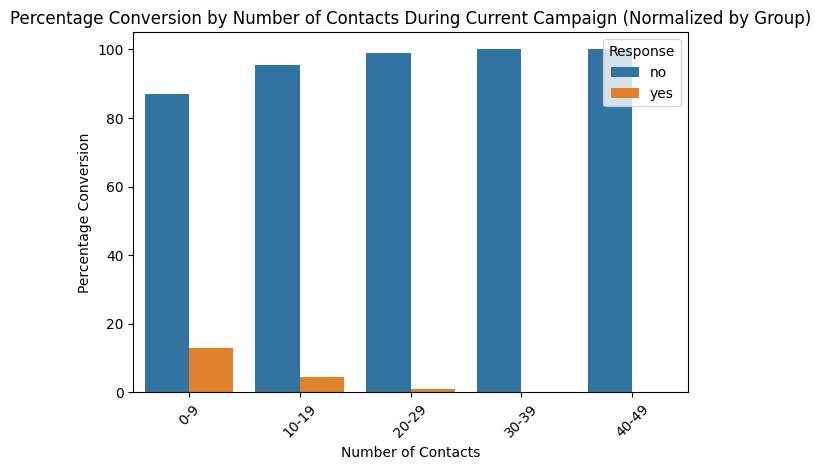

In [102]:
# number of contacts during this campaign
percentages = (
    clean_all_df.groupby('campaign_range')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
ax=sns.barplot(
    data=percentages,
    x='campaign_range', y='percentage', hue='y',
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Number of Contacts')
plt.title('Percentage Conversion by Number of Contacts During Current Campaign (Normalized by Group)')
new_labels=['0-9', '10-19', '20-29', '30-39', '40-49']
ax.set_xticklabels(new_labels)
plt.tight_layout()
plt.savefig("./Subscription_by_Campaign.png", bbox_inches="tight")

plt.show()


In [41]:
clean_all_df['previous'].max() # 7
clean_all_df['previous'].min() # 0

def categorize_previous(previous):
    if previous in [0, 1]:
        return 'prev_0-1'
    elif previous in [2, 3]:
        return 'prev_2-3'
    elif previous in [4, 5]:
        return 'prev_4-5'
    else:
        return 'prev_6-7'

clean_all_df['previous_range'] = clean_all_df['previous'].apply(categorize_previous)


[0 1 2 3 4 5 6 7]


/tmp/ipython-input-633617649.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


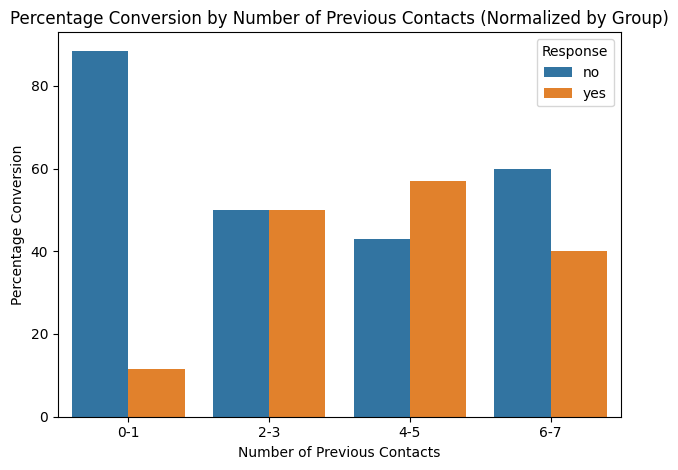

In [103]:
# Number of previous contacts
percentages = (
    clean_all_df.groupby('previous_range')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
ax=sns.barplot(
    data=percentages,
    x='previous_range', y='percentage', hue='y',
)
ax.legend(title="Response")
plt.ylabel('Percentage Conversion')
plt.xlabel('Number of Previous Contacts')
plt.title('Percentage Conversion by Number of Previous Contacts (Normalized by Group)')
new_labels=['0-1', '2-3', '4-5', '6-7']
ax.set_xticklabels(new_labels)
plt.tight_layout()
plt.savefig("./Subscription_by_Previous.png", bbox_inches="tight")

plt.show()

In [45]:
clean_all_df['emp.var.rate'].min() # -3.4
clean_all_df['emp.var.rate'].max() # 1.4

def categorize_emp_var_rate(campaign):
    if campaign >= 1:
        return 'emp_var_gt 1'
    elif campaign >= 0 and campaign < 1:
        return 'emp_var_0 thru 0.9'
    elif campaign >= -1 and campaign < 0:
        return 'emp_var_-1 thru -0.1'
    elif campaign >= -2 and campaign < -1:
        return 'emp_var_-2 thru -1.1'
    elif campaign >= -3 and campaign < -2:
        return 'emp_var_-3 thru -2.1'
    else:
        return 'emp_var_lt -3'

clean_all_df['emp.var.rate.range'] = clean_all_df['emp.var.rate'].apply(categorize_emp_var_rate)


/tmp/ipython-input-3676108518.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


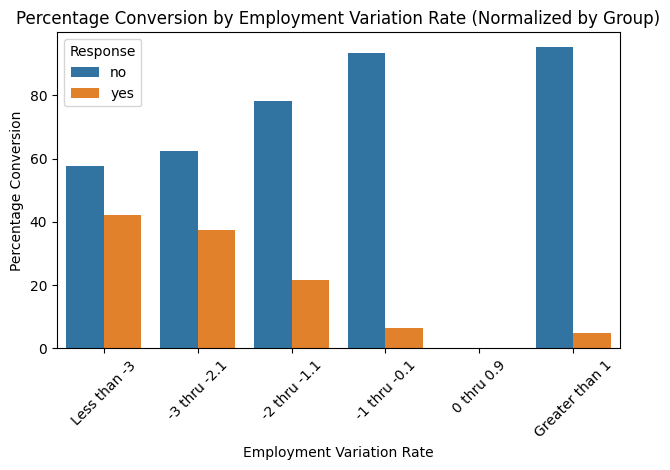

In [104]:
# Number of previous contacts
percentages = (
    clean_all_df.groupby('emp.var.rate.range')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
order=['emp_var_lt -3', 'emp_var_-3 thru -2.1','emp_var_-2 thru -1.1', 'emp_var_-1 thru -0.1', 'emp_var_0 thru 0.9', 'emp_var_gt 1']
ax=sns.barplot(
    data=percentages,
    x='emp.var.rate.range', y='percentage', hue='y',
    order=order
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Employment Variation Rate')
plt.title('Percentage Conversion by Employment Variation Rate (Normalized by Group)')
new_labels=['Less than -3', '-3 thru -2.1', '-2 thru -1.1', '-1 thru -0.1', '0 thru 0.9', 'Greater than 1']
ax.set_xticklabels(new_labels)
plt.tight_layout()

plt.savefig("./Subscription_by_Emp_Var_Rate.png", bbox_inches="tight")

plt.show()

In [47]:
clean_all_df['cons.price.idx'].min() # 92.201
clean_all_df['cons.price.idx'].max() # 94.767

def categorize_cons_price_index(value):
    if value >= 92.0 and value < 92.5:
        return 'con_price_92.0-92.499'
    elif value >= 92.5 and value < 93:
        return 'con_price_92.5-92.999'
    elif value >= 93 and value < 93.5:
        return 'con_price_93-93.499'
    elif value >= 93.5 and value < 94:
        return 'con_price_93.5-93.999'
    elif value >= 94 and value < 94.5:
        return 'con_price_94-94.499'
    else:
        return 'con_price_gt 94.5'
clean_all_df['cons.price.idx.range'] = clean_all_df['cons.price.idx'].apply(categorize_cons_price_index)


/tmp/ipython-input-1853970871.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


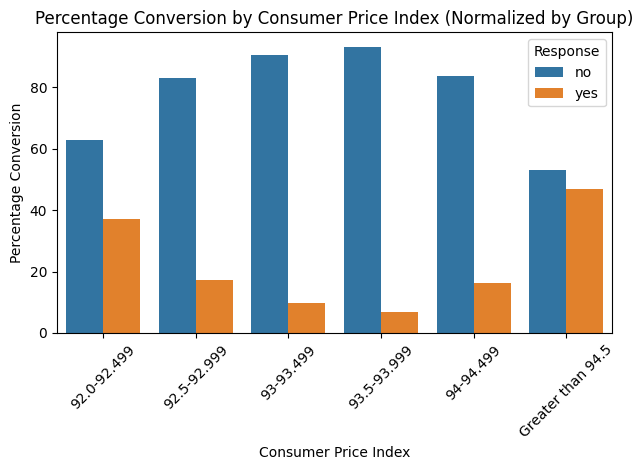

In [96]:
percentages = (
    clean_all_df.groupby('cons.price.idx.range')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
order=['con_price_92.0-92.499', 'con_price_92.5-92.999', 'con_price_93-93.499', 'con_price_93.5-93.999', 'con_price_94-94.499', 'con_price_gt 94.5']
new_labels=['92.0-92.499', '92.5-92.999', '93-93.499', '93.5-93.999', '94-94.499', 'Greater than 94.5']
ax=sns.barplot(
    data=percentages,
    x='cons.price.idx.range', y='percentage', hue='y',
    order=order
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Consumer Price Index')
plt.title('Percentage Conversion by Consumer Price Index (Normalized by Group)')
ax.set_xticklabels(new_labels)
plt.tight_layout()
plt.savefig("./Subscription_by_Cons_Price_Idx.png")

plt.show()

In [49]:
clean_all_df['cons.conf.idx'].min() # -50.8
clean_all_df['cons.conf.idx'].max() # -26.9

def categorize_cons_conf_idx(value):
    if value > -60 and value <= -50:
        return 'cons_conf_-50 thru - 59.9'
    elif value > -40.9 and value <= -40:
        return 'cons_conf_-40 thru -49.9'
    elif value > -30.9 and value <= -30:
        return 'cons_conf_-30 thru -39.9'
    else:
        return 'cons_conf_gt -30'
clean_all_df['cons.conf.idx.range'] = clean_all_df['cons.conf.idx'].apply(categorize_cons_conf_idx)


[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]


/tmp/ipython-input-1072320465.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


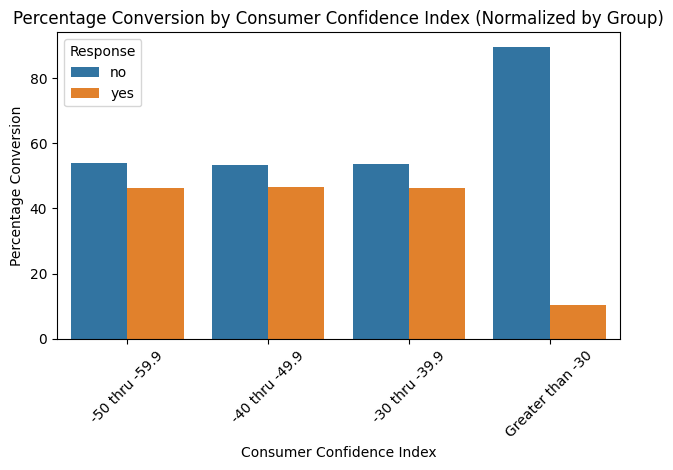

In [105]:
order=['cons_conf_-50 thru - 59.9', 'cons_conf_-40 thru -49.9', 'cons_conf_-30 thru -39.9', 'cons_conf_gt -30']
new_labels=['-50 thru -59.9', '-40 thru -49.9', '-30 thru -39.9', 'Greater than -30']

percentages = (
    clean_all_df.groupby('cons.conf.idx.range')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
ax=sns.barplot(
    data=percentages,
    x='cons.conf.idx.range', y='percentage', hue='y',
    order=order
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Consumer Confidence Index')
plt.title('Percentage Conversion by Consumer Confidence Index (Normalized by Group)')
ax.set_xticklabels(new_labels)
plt.tight_layout()
plt.savefig("./Subscription_by_Cons_Conf_Idx.png", bbox_inches="tight")

plt.show()

In [51]:
clean_all_df['euribor3m'].max() # 5.045
clean_all_df['euribor3m'].min() # 0.634

def convert_euribor3m(value):
    if value >= 0 and value < 1.000:
        return 'euri_0-0.999'
    elif value >= 1.000 and value < 2.000:
        return 'euri_1-1.999'
    elif value >= 2 and value < 3.000:
        return 'euri_2-2.999'
    elif value >= 3 and value < 4.000:
        return 'euri_3-3.999'
    elif value >= 4 and value < 5.000:
        return 'euri_4-4.999'
    else:
        return 'euri_gt 5.000'
clean_all_df['euribor3m_range'] = clean_all_df['euribor3m'].apply(convert_euribor3m)

/tmp/ipython-input-1538393263.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


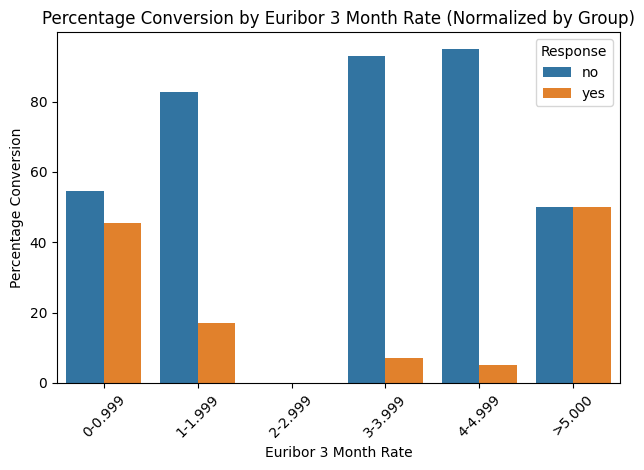

In [98]:
percentages = (
    clean_all_df.groupby('euribor3m_range')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
order=['euri_0-0.999', 'euri_1-1.999', 'euri_2-2.999', 'euri_3-3.999', 'euri_4-4.999', 'euri_gt 5.000']
new_labels=['0-0.999', '1-1.999', '2-2.999', '3-3.999', '4-4.999', '>5.000']
ax=sns.barplot(
    data=percentages,
    x='euribor3m_range', y='percentage', hue='y',
    order=order
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Euribor 3 Month Rate')
plt.title('Percentage Conversion by Euribor 3 Month Rate (Normalized by Group)')
ax.set_xticklabels(new_labels)
plt.tight_layout()
plt.savefig("./Subscription_by_euribor3.png")

plt.show()

In [53]:
clean_all_df['nr.employed'].max() # 5228.1
clean_all_df['nr.employed'].min() # 4963.6

def convert_employed(value):
    if value >= 4900 and value < 5000:
        return 'empl_4900 - 4999.9'
    elif value >= 5000 and value < 5100:
        return 'empl_5000 - 5099.9'
    elif value >= 5100 and value < 5200:
        return 'empl_5100 - 5199.9'
    else:
        return 'empl_gt 5200'
clean_all_df['nr.employed_range'] = clean_all_df['nr.employed'].apply(convert_employed)

/tmp/ipython-input-3742118816.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


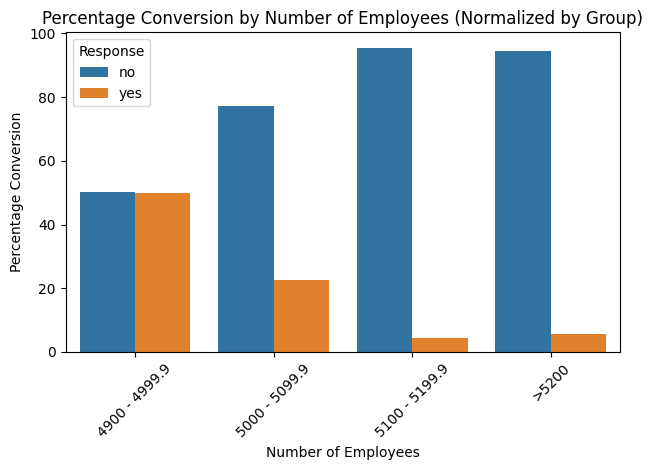

In [106]:
percentages = (
    clean_all_df.groupby('nr.employed_range')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
order=['empl_4900 - 4999.9', 'empl_5000 - 5099.9', 'empl_5100 - 5199.9', 'empl_gt 5200']
new_labels=['4900 - 4999.9', '5000 - 5099.9', '5100 - 5199.9', '>5200']
ax=sns.barplot(
    data=percentages,
    x='nr.employed_range', y='percentage', hue='y',
    order=order
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Number of Employees')
plt.title('Percentage Conversion by Number of Employees (Normalized by Group)')
ax.set_xticklabels(new_labels)
plt.tight_layout()
plt.savefig("./Subscription_by_num_employees.png", bbox_inches="tight")

plt.show()

In [55]:
clean_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job                   30488 non-null  object 
 1   default               30488 non-null  object 
 2   contact               30488 non-null  object 
 3   campaign              30488 non-null  int64  
 4   previous              30488 non-null  int64  
 5   poutcome              30488 non-null  object 
 6   emp.var.rate          30488 non-null  float64
 7   cons.price.idx        30488 non-null  float64
 8   cons.conf.idx         30488 non-null  float64
 9   euribor3m             30488 non-null  float64
 10  nr.employed           30488 non-null  float64
 11  y                     30488 non-null  object 
 12  season                30488 non-null  object 
 13  age_range             30488 non-null  object 
 14  y_numeric             30488 non-null  int64  
 15  campaign_range        30

In [ ]:
percentages = (
    clean_all_df.groupby('nr.employed_range')['y']
      .value_counts(normalize=True)
      .mul(100)
      .rename('percentage')
      .reset_index()
)
percentages
order=['winter', 'spring', 'summer', 'fall']
ax=sns.barplot(
    data=percentages,
    x='season', y='percentage', hue='y',
    order=order
)
ax.legend(title="Response")
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Percentage Conversion')
plt.xlabel('Season')
plt.title('Percentage Conversion by Season (Normalized by Group)')
plt.savefig("./Subscription_by_Season.png")

plt.show()

In [69]:
# Using the following data with more granular categories based on the previous regression
df=clean_all_df[['season', 'age_range', 'contact', 'nr.employed_range', 'euribor3m_range', 'cons.conf.idx.range', 'cons.price.idx.range', 'emp.var.rate.range', 'campaign_range', 'previous_range', 'default']]
df.info()

dummies_season=pd.get_dummies(df['season'], dtype=int)
dummies_age_range=pd.get_dummies(df['age_range'], dtype=int)
dummies_contact=pd.get_dummies(df['contact'], dtype=int)
dummies_employed_rangee=pd.get_dummies(df['nr.employed_range'], dtype=int)
dummies_euribor3m_range=pd.get_dummies(df['euribor3m_range'], dtype=int)
dummies_cons_conf_idx_range=pd.get_dummies(df['cons.conf.idx.range'], dtype=int)
dummies_cons_price_idx_range=pd.get_dummies(df['cons.price.idx.range'], dtype=int)
dummies_emp_var_rate_range=pd.get_dummies(df['emp.var.rate.range'], dtype=int)
dummies_campaign_range=pd.get_dummies(df['campaign_range'], dtype=int)
dummies_previous_range=pd.get_dummies(df['previous_range'], dtype=int)
dummies_default=pd.get_dummies(df['default'], dtype=int)

additional_data_df = pd.concat([dummies_season,
  dummies_age_range,
  dummies_contact,
  dummies_employed_rangee,
  dummies_euribor3m_range,
  dummies_cons_conf_idx_range,
  dummies_cons_price_idx_range,
  dummies_emp_var_rate_range,
  dummies_campaign_range,
  dummies_previous_range,
  dummies_default], axis=1)
y=clean_all_df['y_numeric']
X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test=train_test_split(additional_data_df, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   season                30488 non-null  object
 1   age_range             30488 non-null  object
 2   contact               30488 non-null  object
 3   nr.employed_range     30488 non-null  object
 4   euribor3m_range       30488 non-null  object
 5   cons.conf.idx.range   30488 non-null  object
 6   cons.price.idx.range  30488 non-null  object
 7   emp.var.rate.range    30488 non-null  object
 8   campaign_range        30488 non-null  object
 9   previous_range        30488 non-null  object
 10  default               30488 non-null  object
dtypes: object(11)
memory usage: 2.8+ MB


In [70]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso_clf', LogisticRegression(penalty='l1', solver='liblinear', C=1.0))  # Lasso
])

pipeline.fit(X_lasso_train, y_lasso_train)

y_pred = pipeline.predict(X_lasso_test)
print("Accuracy:", accuracy_score(y_lasso_test, y_pred))
poly_feature_names = pipeline.named_steps['poly'].get_feature_names_out(X_lasso_train.columns)
# Get coefficients from L1 logistic regression
coefficients = pipeline.named_steps['lasso_clf'].coef_[0]

feature_importance = pd.DataFrame({
    'feature': poly_feature_names,
    'coefficient': coefficients,
}).sort_values(by='coefficient', ascending=False)

print(feature_importance)

Accuracy: 0.8791407018694654
                              feature  coefficient
235                30-49 euri_0-0.999     0.176232
443      cellular con_price_94-94.499     0.174931
106               spring euri_0-0.999     0.139975
113  spring cons_conf_-50 thru - 59.9     0.136458
650        euri_0-0.999 emp_var_lt -3     0.125005
..                                ...          ...
987        con_price_gt 94.5 prev_4-5    -0.081339
622           empl_gt 5200 camp_20-29    -0.088046
589     empl_5100 - 5199.9 camp_10-19    -0.094575
478   telephone con_price_93.5-93.999    -0.105406
172                 summer camp_20-29    -0.126282

[1127 rows x 2 columns]


In [71]:
print('top 15', feature_importance.head(15))
print('bottom 15', feature_importance.tail(15))


top 15                                feature  coefficient
235                 30-49 euri_0-0.999     0.176232
443       cellular con_price_94-94.499     0.174931
106                spring euri_0-0.999     0.139975
113   spring cons_conf_-50 thru - 59.9     0.136458
650         euri_0-0.999 emp_var_lt -3     0.125005
481     telephone emp_var_-1 thru -0.1     0.123992
430              cellular euri_0-0.999     0.102137
292         50-69 emp_var_-2 thru -1.1     0.097997
285        50-69 con_price_92.0-92.499     0.096837
272           50-69 empl_4900 - 4999.9     0.094704
657              euri_0-0.999 prev_2-3     0.085261
535    empl_5000 - 5099.9 euri_0-0.999     0.082118
688              euri_1-1.999 prev_4-5     0.081877
252         30-49 emp_var_-3 thru -2.1     0.080195
678  euri_1-1.999 emp_var_-3 thru -2.1     0.078008
bottom 15                                   feature  coefficient
451                   cellular camp_10-19    -0.063923
240        30-49 cons_conf_-30 thru -39.9

All of my models hovered around an accuracy of 88-89%. This is close to the original goal of 90% but not quite there. The SVC model performed best in terms of accuracy but was done on a subset of the data because of its high computational requirements. The Decision Tree Classifier was the fastest and maintained accuracy so that model would be the most helpful out of the ones here. It is possible that additional analysis and exploring additional hyperparameter values would further improve results, although cross validation was used to optimized the current hyperparameters.

Based on these findings, clients are more likely to accept the offer if the Euribor 3 month rate is between 0 - 0.999, the employment variation rate is -1 through -3, or within an age range of 50-69. Conversely, clients are more likely to reject the offer if the number of contacts performed during this campaign and for this client is 10-29 (indicating that continuing to contact them beyond 10 times is unlikely to lead to conversion), the consumer price index is greater than 92, and, to a lesser extent, if the client falls in an age range of 30 - 49.